# K- Means Clustering Algorithm

## import libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

(<Figure size 576x576 with 1 Axes>,
 Text(0.5, 1.0, 'Sunny-Lake Original Image'),
 <matplotlib.image.AxesImage at 0x7fef005626a0>)

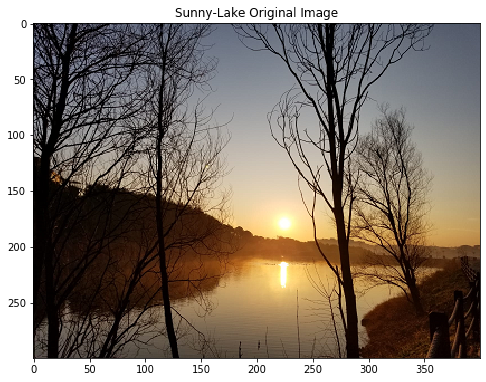

In [2]:
## read in the image
image_name = "SunnyLake.bmp"

##BGR image 
image = cv2.imread(image_name)

##Convert to RGB
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (8,8)) , plt.title("Sunny-Lake Original Image") , plt.imshow(img)


## Convert Image to Gray Scale

(<Figure size 576x576 with 1 Axes>,
 Text(0.5, 1.0, 'GrayScale Sunny-Lake Image'),
 <matplotlib.image.AxesImage at 0x7fef004d7550>)

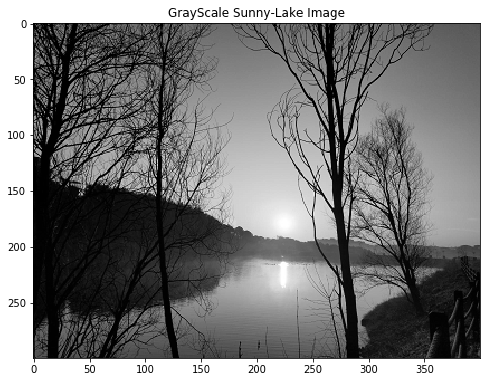

In [3]:
#convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#display the image
plt.figure(figsize = (8,8)) , plt.title("GrayScale Sunny-Lake Image") , plt.imshow(gray , cmap  = 'gray')

## K-means Segmentation

In [4]:
def kmeans(image, k):
    '''
    image : input image to be segmented 
    
    k : number of clusters. 
    
    color_format: string "gray" or "RGB"
    
    ''' 
    
    #check if image is RGB or Gray scale
    if len(image.shape) == 3:
        ## Reshape the image to 2D matrix (height*width) X 3 of pixels positions and RGB color channels
        X = image.reshape(-1 , 3) #datapoints, feature matrix
        
    else:        
        X = image.reshape(-1 , 1) #datapoints, feature matrix

    #convert pixel values to float
    X = np.float32(X)

    # Algorithm termination criteria. Stop the algorithm if either accuracy (epsilon) or maximum number of iterations is reached.
    cv2.TERM_CRITERIA_EPS  = 1
    cv2.TERM_CRITERIA_MAX_ITER = 20
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, cv2.TERM_CRITERIA_MAX_ITER, cv2.TERM_CRITERIA_EPS)

    flags = cv2.KMEANS_RANDOM_CENTERS

    #k-means algorithm
    compactnesss, labels, centers = cv2.kmeans(X , k , None, criteria, 10, flags) #returns compactness, labels , cluster centroid positions
    
    ##convert centers to integers
    centers = np.uint8(centers)

    ## flatten the labels array
    labels = labels.flatten()

    #reconstruct the segmented image
    seg_img = centers[labels]
    
    

    ## reshape segmented image to original size
    segmented_img = seg_img.reshape(image.shape)

    
    #Display the original image
    plt.figure(figsize = (8,8)) , plt.title("Image Segmented into " + str(k) + " Groups") , plt.imshow(segmented_img)
    



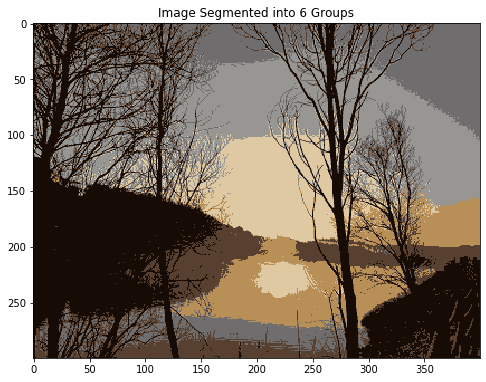

In [5]:
kmeans(img , 6)

## Compute Texture Feature of Image

In [6]:
##compute RGB mean Features
def meanFeatures(image):

    h , w = image.shape[:-1]

    #create a image mask of zeros
    mx = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            #compute RGB mean of each pixel
            mx[i][j] = int(np.mean(img[i, j]))
            
            
    return mx




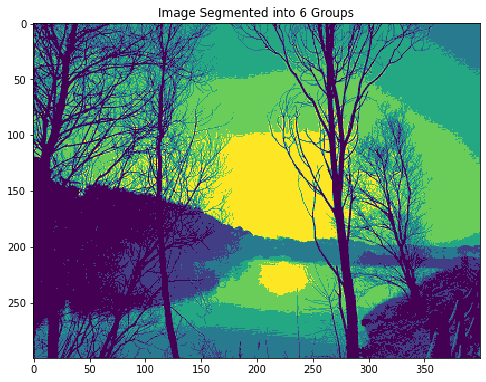

In [25]:
kmeans(meanFeatures(img) , 6)

In [24]:
##compute RGB variance Features
def varianceFeatures(image):

    h , w = image.shape[:-1]

    #create a image mask of zeros
    vx = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            #compute RGB mean of each pixel
            vx[i][j] = int(np.square(np.std(img[i, j])))
            
            
    return vx

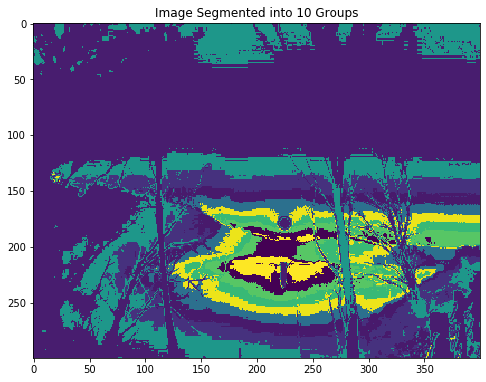

In [28]:
kmeans(varianceFeatures(img) , 10)

# Mean-Shift Clustering Algorithm

In [20]:
def meanshift(image , window_size):
    
    '''
    image : input image to be segmented 
    window_size: integer specifying the bandwidth or window size
    ''' 
    
    #create RGB feature vector
    if len(image.shape) == 3:
        ## Reshape the image to 2D matrix (height*width) X 3 of pixels positions and RGB color channels
        X = image.reshape(-1 , 3) #datapoints, feature matrix
        
    #create grayscale feature vector
    else: 
        
        X = image.reshape(-1 , 1) #datapoints, feature matrix
           
    #bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100) #automatically compute best window size
    
    #set 
    bandwidth = window_size
    
    #initialize meanshift object
    ms = MeanShift(bandwidth = bandwidth ,  seeds = None, bin_seeding = False , min_bin_freq = 1 ,
                   cluster_all = True, n_jobs = -1 , max_iter = 300)

    ##fit training data
    ms.fit(X)
    
    #retrieve labels of pixels
    labels = ms.labels_
    
    #get cluster center positions
    centers = ms.cluster_centers_
      
    ##convert centers to integers
    centers = np.uint8(centers)
   
    #get number of clusters
    number_clusters = len(np.unique(labels))
    
    ## flatten the labels array
    labels = labels.flatten()

    #reconstruct the segmented image
    seg_img = centers[labels]

    ## reshape segmented image to original size
    segmented_img = seg_img.reshape(image.shape)

    #Display the original image
    plt.figure(figsize = (8,8)) , plt.title("Image Segmented into " + str(number_clusters) + " Groups") , plt.imshow(segmented_img)


    
    

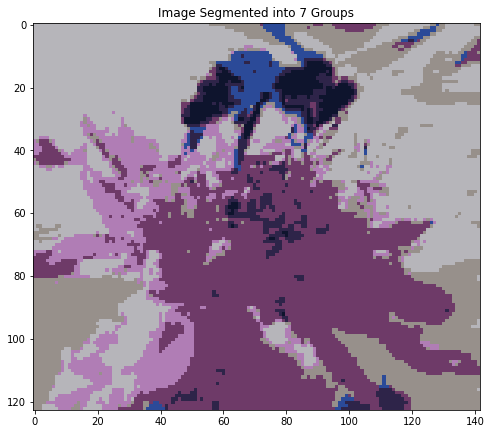

In [32]:
meanshift(img , 32)